In [7]:
from __future__ import division 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import pylab as pl 
import numpy as np 
%matplotlib inline

In [8]:
df_raw = pd.read_csv ("http://www.ats.ucla.edu/stat/data/binary.csv")
print df_raw.head()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


## Questions 

#### Question 1.  How many observations are in our dataset?

In [9]:
df_raw.count()

admit    400
gre      400
gpa      400
rank     400
dtype: int64

Answer: n = 400

#### Question 2. Create a summary table 

In [10]:
df_raw.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores might have a larger standard deviation than GPA because GRE values are spread further apart. 

#### Question 4. Drop data points with missing data

In [24]:
from numpy import nan as NA
df_raw.dropna(axis=1, how='all')
cleaned = df_raw.dropna()
print cleaned

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: You might check this by displaying the dropped data. 

#### Question 6. Create box plots for GRE and GPA

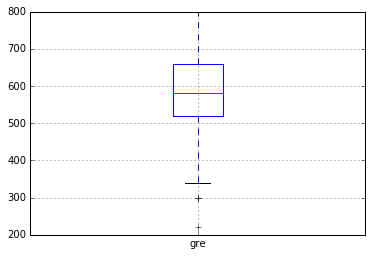

In [30]:
import pylab as pl
df_raw.boxplot(column = 'gre',return_type = 'axes')
pl.show()

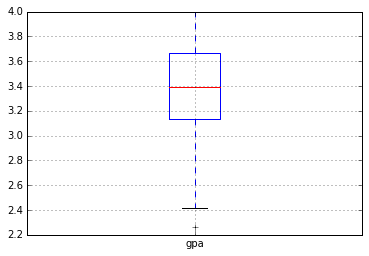

In [31]:
df_raw.boxplot(column = 'gpa' ,return_type = 'axes')
pl.show()

#### Question 7. What do the plots show? 

Answer: In both the GRE and GPA box plots the top whisker is shorter than the bottom whisker which indicates that the data distribution is skewed left. 

#### Question 8.  Describe each distribution 

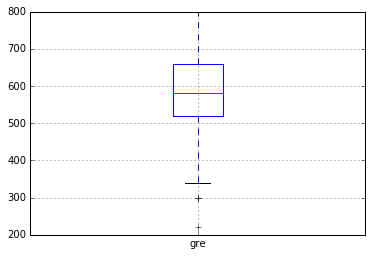

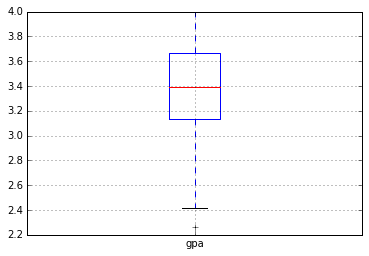

In [28]:
import pylab as pl
df_raw.boxplot(column = 'gre', return_type = 'axes')
pl.show()

df_raw.boxplot (column = 'gpa', return_type = 'axes')
pl.show()

As the above plots illustrate: 

The GRE data is distributed as follows: minimum 220, maximum 800, standard deviation 115.52, 25% 520, 50 % 580, 75% 660.

The GPA data is distributed as follows : minimum 2.26, maximum 4.0, standard deviation 0.381, 25% 3.13, 50% 3.395, 75% 3.67. 

#### Question 9. If our model had an assumption of a normal distribution would we meet the requirement?

As we see in the above boxplots, the data is skewed and thus does not have a normal distribution. 

#### Question 10. Does this distribution need correction? If so, why? How?

Yes, becuase the data is skewed it does not meet the requirements of a normal distribution. 

#### Question 11. Which of our variables are potentially colinear?

See below: 

In [29]:
cleaned.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


#### Question 12. What did you find?

In the above correlation matrix we find that while gre and gpa can impact admission rates(an increase in either increases likelihood of admission), the strongest correlation is between the prestige of the undergraduate school and graduate school admission rates. 

#### Question 13. Write an analysis plan for exploring the association between grad school admission rates and prestige of undergraduate schools. 

As there appears to be a corrleation between the prestige of a candidate's undergraduate school and grad school admission it is important to explore this further. Because there are multiple variables that might affect admission rates a regression analysis might be appropriate for this dataset. 

#### Question 14. What is your hypothesis?

Hypothesis: There is a correlation between the prestige of a candidate's undergraduate school and likelihood of grad school admission. 

Null Hyporthesis: There is no correlation  between the prestige of a candidate's undergraduate school and likelihood of grad school admission. 